In [ ]:
%pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedwaelnasef/cars-dataset")
!mkdir data
!cp {path}/cars.csv data/cars.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/cars.csv')
df.head()
df['seats'].value_counts()  


seats
5 Seater     3471
4 Seater      847
7 Seater      532
2 Seater      428
8 Seater      211
             ... 
14.0            1
13 Seater       1
230             1
220             1
2.8             1
Name: count, Length: 82, dtype: int64

In [ ]:
df[df['top_speed'] == 'Automatic']

In [ ]:
df[df['car name'] == 'Mercedes-Benz EQV 2021 6 seater']

In [4]:
# Replace non-numeric values in horse_power with NaN
df['horse_power'] = df['horse_power'].replace(r'^\D*$', np.nan, regex=True)
df.isna().sum()

car name             0
price                0
engine_capacity      0
cylinder           624
horse_power        122
top_speed            0
seats                0
brand                0
country              0
dtype: int64

In [6]:
df.dropna(subset=['horse_power'], inplace=True)
df.isna().sum()

car name             0
price                0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                0
brand                0
country              0
dtype: int64

In [14]:
mask = df['top_speed'].str.contains(r'^\D*$', regex=True)
df.drop(df[mask].index, inplace=True)
df.isna().sum()
df.reset_index(drop=True, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6143 non-null   object
 1   price            6143 non-null   object
 2   engine_capacity  6143 non-null   object
 3   cylinder         5519 non-null   object
 4   horse_power      6143 non-null   object
 5   top_speed        6143 non-null   object
 6   seats            6143 non-null   object
 7   brand            6143 non-null   object
 8   country          6143 non-null   object
dtypes: object(9)
memory usage: 432.1+ KB


In [19]:
df[df['cylinder'] == 'N/A, Electric']

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
45,Lotus Evija 2021 2000 kW (Type 130),TBD,0.0,"N/A, Electric",1973,320,2 Seater,lotus,ksa
105,Chevrolet Bolt EV 2021 LT FWD,TBD,0.0,"N/A, Electric",500,360,Automatic,chevrolet,ksa
160,Mercedes-Benz EQC 2021 400 4MATIC,TBD,0.0,"N/A, Electric",402,180,5 Seater,mercedes-benz,ksa
1375,Lotus Evija 2021 2000 kW (Type 130),"BHD 829,510",0.0,"N/A, Electric",1973,320,2 Seater,lotus,bahrain
2262,Lotus Evija 2021 2000 kW (Type 130),"QAR 8,010,200",0.0,"N/A, Electric",1973,320,2 Seater,lotus,qatar
4043,Lotus Evija 2021 2000 kW (Type 130),"KWD 668,580",0.0,"N/A, Electric",1973,320,2 Seater,lotus,kuwait
5007,Mercedes-Benz EQC 2021 400 4MATIC,TBD,0.0,"N/A, Electric",402,180,5 Seater,mercedes-benz,uae
5571,Chevrolet Bolt EV 2021 LT FWD,"AED 168,900",0.0,"N/A, Electric",500,360,Automatic,chevrolet,uae
5910,Tesla Model X 2021 90D,"AED 353,115",0.0,"N/A, Electric",489,966,Automatic,tesla,uae
5912,Tesla Model X 2021 75D,"AED 349,125",0.0,"N/A, Electric",329,7 Seater,6.2,tesla,uae


In [20]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())

In [21]:
df.shape[0] - df[df['price'].str.contains(r'\d', regex=True)].shape[0]

1230

In [22]:
dataframe_no_price = df[df['price'].str.contains(r'^\D*$', regex=True) == True]['price']
dataframe_no_price.unique()

array(['Orangeburst Metallic', 'Following', 'TBD', 'Clear White',
       'Birch Light Metallic', 'Walnut Brown/Billet Silver',
       'Fathom Blue Pearlcoat', 'Sapphire Blue Metallic',
       'Billet Silver/Walnut Brown', 'Guard, Stone Gray',
       'Smoked Quartz Metallic Tinted Clearcoat', 'DISCONTINUED',
       'Tasman Blue', 'Follow', 'Electric Blue/ Super Black',
       'Mosaic Black Metallic', 'Platinum White Pearl',
       'Gun Metallic/ Super Black', 'Chalk White',
       'Blue Streak Metallic W/Midnight Black Metallic Roof',
       'Black Cherry Metallic', 'Ocean Blue Pearl', 'Cajun Red Tintcoat',
       'Hellayella Clear Coat', 'Gun Metallic',
       'White Platinum Metallic Tri-Coat', 'Cayenne Red Metallic',
       'Obsidian Blue Pearl', 'In-Violet Clear Coat',
       'Crystal Black Silica', 'Carbonized Gray', 'Bellanova White Pearl',
       'Modern Steel Metallic', 'Sangria Metallic Clear Coat',
       'Magnetite Gray Metallic', 'Agate Black', 'Indigo Blue',
       'Iridesc

In [ ]:
dataframe_no_price.nunique()

In [23]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

In [ ]:
df['price'] = df['price'].astype(float)

In [ ]:
df.isna().sum()

In [24]:
# Extract currency and number
pattern = r'([A-Z]+)\s([\d,]+)'
extracted = df['price'].str.extract(pattern, expand=True)

# Rename columns for clarity
extracted.columns = ['currency', 'amount']

df = pd.concat([df, extracted], axis=1)
df.drop(columns='price', inplace=True)

df.rename(columns={'amount': 'price'}, inplace=True)

# # Handle non-matching rows (e.g., fill NaN with 'Unknown' for currency and 0 for amount)
# extracted['currency'].fillna('Unknown', inplace=True)
# extracted['amount'].fillna('0', inplace=True)

# print(extracted)
df.head()

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,currency,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8 Seater,8.8,peugeot,ksa,SAR,"140,575"
1,Suzuki Jimny 2021 1.5L Automatic,1.5,4,102,145,4 Seater,suzuki,ksa,SAR,"98,785"
2,Ford Bronco 2021 2.3T Big Bend,2.3,4,420,4 Seater,7.5,ford,ksa,SAR,"198,000"
3,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4,140,190,5 Seater,honda,ksa,NaN,NaN
4,Honda HR-V 2021 1.8 i-VTEC EX,1.8,4,140,190,5 Seater,honda,ksa,SAR,"95,335"


In [25]:
df['price'] = df['price'].str.replace(',', '').astype(float)

In [26]:


# Dictionary for mapping country to currency
country_to_currency = {
    'ksa': 'SAR',      # Saudi Riyal
    'egypt': 'EGP',    # Egyptian Pound
    'bahrain': 'BHD',  # Bahraini Dinar
    'qatar': 'QAR',    # Qatari Riyal
    'oman': 'OMR',     # Omani Rial
    'kuwait': 'KWD',   # Kuwaiti Dinar
    'uae': 'AED'       # United Arab Emirates Dirham
}

# Dictionary for mapping currency to USD exchange rate
currency_to_usd = {
    'SAR': 0.27,  # Saudi Riyal to USD
    'EGP': 0.032, # Egyptian Pound to USD
    'BHD': 2.65,  # Bahraini Dinar to USD
    'QAR': 0.27,  # Qatari Riyal to USD
    'OMR': 2.60,  # Omani Rial to USD
    'KWD': 3.30,  # Kuwaiti Dinar to USD
    'AED': 0.27   # United Arab Emirates Dirham to USD
}

# Map country to currency
df['currency'] = df['country'].map(country_to_currency)

df['price'] = df.apply(lambda row: row['price'] * currency_to_usd[row['currency']], axis=1)

# Compute the mean price for each country
mean_prices = df.groupby('car name')['price'].transform('mean')

# Replace only the missing values with the mean price of their respective groups
df['price'] = df['price'].fillna(mean_prices)


# Convert prices to USD
df.head()

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,currency,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8 Seater,8.8,peugeot,ksa,SAR,37955.25
1,Suzuki Jimny 2021 1.5L Automatic,1.5,4,102,145,4 Seater,suzuki,ksa,SAR,26671.95
2,Ford Bronco 2021 2.3T Big Bend,2.3,4,420,4 Seater,7.5,ford,ksa,SAR,53460.00
3,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4,140,190,5 Seater,honda,ksa,SAR,NaN
4,Honda HR-V 2021 1.8 i-VTEC EX,1.8,4,140,190,5 Seater,honda,ksa,SAR,25740.45


In [27]:
median_na = df.groupby('brand')['price'].transform('median')
df['price'] = df['price'].fillna(median_na)


In [ ]:
df.head()

In [28]:
df.dropna(subset=['price'], inplace=True)
df.isna().sum()

car name             0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                0
brand                0
country              0
currency             0
price                0
dtype: int64

In [29]:
df.drop(columns='currency', inplace=True)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
indices = df[df['top_speed'].str.contains('Seater')].index

temp = df.loc[indices, 'seats']
df.loc[indices, 'seats'] = df['top_speed']
df.loc[indices, 'top_speed'] = temp

In [32]:
df['top_speed'].str.contains('Seater').sum()

np.int64(0)

In [33]:
df.loc[indices].head(50)

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8.8,8 Seater,peugeot,ksa,37955.250000
2,Ford Bronco 2021 2.3T Big Bend,2.3,4,420,7.5,4 Seater,ford,ksa,53460.000000
8,Ford Bronco 2021 2.7T Outer Banks,2.7,6,542,6.9,5 Seater,ford,ksa,64260.000000
14,Aston Martin DBS Superleggera 2021 5.2T V12,5.2,12,900,3.4,4 Seater,aston-martin,ksa,374344.740000
16,Genesis GV80 2021 3.5T Royal (AWD),3.5,6,530,5.5,7 Seater,genesis,ksa,82350.000000
18,Hyundai Palisade 2021 3.8L GDi (AWD) Premium -...,3.8,6,355,7.7,8 Seater,hyundai,ksa,54054.000000
24,Hyundai Palisade 2021 3.5L GDi (FWD),3.5,6,335,7.7,7 Seater,hyundai,ksa,38416.950000
64,Hyundai Santa Fe 2021 3.5L Mid (AWD),3.5,6,363,7.8,7 Seater,hyundai,ksa,35610.300000
66,Great Wall Wingle 7 2021 2.0T Double Cabin (4x4),2.0,4,315,15,5 Seater,great-wall,ksa,19553.130000
67,Hyundai Santa Fe 2021 3.5L High (AWD),3.5,6,363,7.8,7 Seater,hyundai,ksa,38580.300000


In [34]:
# Columns to process
columns = ['seats', 'engine_capacity', 'brand', 'top_speed', 'cylinder', 'horse_power']

# Function to get the mode (most frequent value)
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None

df[columns] = df.groupby('car name')[columns].transform(get_mode)

In [101]:
df['top_speed'] = df['top_speed'].astype(int)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6116 entries, 0 to 6124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6116 non-null   object 
 1   engine_capacity  6116 non-null   float64
 2   cylinder         5492 non-null   float64
 3   horse_power      6116 non-null   int64  
 4   top_speed        6116 non-null   int64  
 5   seats            6116 non-null   int64  
 6   brand            6116 non-null   object 
 7   country          6116 non-null   object 
 8   price            6116 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 477.8+ KB


In [37]:
df.isna().sum()

car name             0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                0
brand                0
country              0
price                0
dtype: int64

In [53]:
df['seats'].value_counts()

seats
5 Seater     3579
4 Seater      877
7 Seater      535
2 Seater      455
8 Seater      240
6 Seater      116
N A           102
3 Seater       88
9 Seater       85
14 Seater      16
Automatic      10
15 Seater       9
12 Seater       8
18 Seater       4
13 Seater       1
Name: count, dtype: int64

will do median imputation based on brand, but first, we have to convert `seats` to an int

In [62]:
mask = df['seats'].str.contains(r'^\D*$')
df[mask].head(5)

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
5,Peugeot Expert 2021 Van L3 A/T,2.0,4,120,170.0,N A,peugeot,ksa,22368.15
6,Peugeot Expert 2021 Van L3 M/T,2.0,4,120,170.0,N A,peugeot,ksa,20667.15
35,Mercedes-Benz GLB 2021 250 4MATIC,0.0,4,224,236.0,N A,mercedes-benz,ksa,79852.23
37,Volkswagen Passat 2021 2.5L Highline,2.5,4,170,190.0,N A,volkswagen,ksa,32585.00
38,Land Rover Range Rover Evoque 2021 2.0T R-Dyna...,2.0,4,200,216.0,N A,land-rover,ksa,74364.75


Convert all values in seats that have no number to `NA`

In [ ]:
df['seats'] = df['seats'].replace(r'^\D*$', np.nan, regex=True)
df.isna().sum()

car name             0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats              112
brand                0
country              0
price                0
dtype: int64

In [65]:
df.head()

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8.8,8 Seater,peugeot,ksa,37955.250
1,Suzuki Jimny 2021 1.5L Automatic,1.5,4,102,145.0,4 Seater,suzuki,ksa,26671.950
2,Ford Bronco 2021 2.3T Big Bend,2.3,4,420,7.5,4 Seater,ford,ksa,53460.000
3,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4,140,190.0,5 Seater,honda,ksa,28179.975
4,Honda HR-V 2021 1.8 i-VTEC EX,1.8,4,140,190.0,5 Seater,honda,ksa,25740.450


In [61]:
df[df['brand']=='peugeot']

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8.8,8 Seater,peugeot,ksa,37955.25
5,Peugeot Expert 2021 Van L3 A/T,2.0,4,120,170.0,N A,peugeot,ksa,22368.15
6,Peugeot Expert 2021 Van L3 M/T,2.0,4,120,170.0,N A,peugeot,ksa,20667.15
110,Peugeot 508 2021 1.6T GT Line,1.6,4,165,220.0,5 Seater,peugeot,ksa,35100.00
208,Peugeot 2008 2021 1.6L (115HP) Active+,1.6,4,115,200.0,5 Seater,peugeot,ksa,18630.00
...,...,...,...,...,...,...,...,...,...
5358,Peugeot 508 2021 1.6T Active+,1.6,4,180,230.0,5 Seater,peugeot,uae,25623.00
5442,Peugeot 3008 2021 1.6T GT,1.6,4,181,222.0,5 Seater,peugeot,uae,37773.00
5456,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8.8,8 Seater,peugeot,uae,37773.00
5460,Peugeot 5008 2021 1.6T GT Line,1.6,4,180,219.0,7 Seater,peugeot,uae,37773.00


In [73]:
# Function to extract the number from 'seats' values that contain the string 'Seats'
def extract_seats(value):
    if pd.isna(value):
        return value
    if type(value) == float:
        return int(value)
    if 'Seater' in value or 'Seats' in value:
        return int(value.split()[0])

# Apply the function to the 'seats' column
df['seats'] = df['seats'].apply(extract_seats)

In [77]:
median = df.groupby('brand')['seats'].transform('median')
df['seats'] = df['seats'].fillna(median)
df.isna().sum()

car name             0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                9
brand                0
country              0
price                0
dtype: int64

In [79]:
df.dropna(subset=['seats'], inplace=True)
df.isna().sum()

car name             0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                0
brand                0
country              0
price                0
dtype: int64

In [81]:
df['seats'] = df['seats'].astype(int)
df.head()

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4,180,8.8,8,peugeot,ksa,37955.250
1,Suzuki Jimny 2021 1.5L Automatic,1.5,4,102,145.0,4,suzuki,ksa,26671.950
2,Ford Bronco 2021 2.3T Big Bend,2.3,4,420,7.5,4,ford,ksa,53460.000
3,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4,140,190.0,5,honda,ksa,28179.975
4,Honda HR-V 2021 1.8 i-VTEC EX,1.8,4,140,190.0,5,honda,ksa,25740.450


In [103]:
df['cylinder'] = df['cylinder'].astype(float)
df['horse_power'] = df['horse_power'].astype(int)
df['engine_capacity'] = df['engine_capacity'].astype(float)
df.dtypes

car name            object
engine_capacity    float64
cylinder           float64
horse_power          int64
top_speed            int64
seats                int64
brand               object
country             object
price              float64
dtype: object

In [107]:
df[~df['cylinder'].isna()]

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Peugeot Traveller 2021 L3 VIP,2.0,4.0,180,8,8,peugeot,ksa,37955.250
1,Suzuki Jimny 2021 1.5L Automatic,1.5,4.0,102,145,4,suzuki,ksa,26671.950
2,Ford Bronco 2021 2.3T Big Bend,2.3,4.0,420,7,4,ford,ksa,53460.000
3,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4.0,140,190,5,honda,ksa,28179.975
4,Honda HR-V 2021 1.8 i-VTEC EX,1.8,4.0,140,190,5,honda,ksa,25740.450
...,...,...,...,...,...,...,...,...,...
6119,Lamborghini Aventador SVJ 2021 LP770-4 Coupe,6.5,12.0,770,350,2,lamborghini,uae,537300.000
6120,Bentley Mulsanne 2021 6.75L V8 Extended Wheelbase,6.8,8.0,505,296,5,bentley,uae,286000.000
6121,Ferrari SF90 Stradale 2021 4.0T V8 Plug-in-Hybrid,4.0,8.0,25,800,4,ferrari,uae,476847.000
6122,Rolls Royce Wraith 2021 6.6L Base,6.6,12.0,624,250,4,rolls-royce,uae,378000.000


In [109]:
df['cylinder'].value_counts()

cylinder
4.0     2798
6.0     1475
8.0      912
3.0      137
12.0     120
10.0      21
5.0       17
0.0       11
16.0       1
Name: count, dtype: int64

In [110]:
def find_cylinder_count(engine_capacity):
    if engine_capacity < 1.5:
        return 3
    elif engine_capacity < 2:
        return 4
    elif engine_capacity < 2.5:
        return 5
    elif engine_capacity < 4:
        return 6
    elif engine_capacity < 6:
        return 8
    elif engine_capacity < 8:
        return 12
    
df['cylinder'] = df['cylinder'].fillna(df['engine_capacity'].apply(find_cylinder_count))

df.isna().sum()
    
    

car name            0
engine_capacity     0
cylinder           12
horse_power         0
top_speed           0
seats               0
brand               0
country             0
price               0
dtype: int64

In [115]:
mask = df[df.isna().any(axis=1)]
df.loc[mask.index, 'engine_capacity'] = df.loc[mask.index, 'engine_capacity']/1000
df.loc[mask.index]

,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
442,Volkswagen Golf 2021 1.2L S,1.998,NaN,105,192,5,volkswagen,ksa,32315.000
1146,Jaguar XE 2021 2.0T R Dynamic (300 PS),2.000,NaN,297,250,5,jaguar,egypt,35200.000
1154,Volkswagen Golf 2021 1.2L S,1.998,NaN,105,192,5,volkswagen,egypt,32315.000
1155,Chevrolet Optra 2021 1.5L Basic,1.485,NaN,110,170,5,chevrolet,egypt,6448.000
1158,Chevrolet Aveo 2021 1.5L A/T,1.498,NaN,86,166,5,chevrolet,egypt,6332.800
1172,Chevrolet Dabbabah 2021 2.5L Single Cab Base Line,2.500,NaN,79,150,2,chevrolet,egypt,9430.400
1187,Chevrolet Dabbabah 2021 2.5L Single Cab High Line,2.500,NaN,79,150,2,chevrolet,egypt,9590.400
1268,BMW X1 2021 sDrive20i (m sport package),1.998,NaN,192,225,5,bmw,egypt,25600.000
1270,BMW X1 2021 sDrive20i (xLine),1.998,NaN,192,225,5,bmw,egypt,22400.000
1299,Honda CR-V 2021 1.5T EX (2WD),1.498,NaN,188,200,5,honda,egypt,28179.975


In [116]:
df['cylinder'] = df['cylinder'].fillna(df['engine_capacity'].apply(find_cylinder_count))
df.isna().sum()

car name           0
engine_capacity    0
cylinder           0
horse_power        0
top_speed          0
seats              0
brand              0
country            0
price              0
dtype: int64

In [119]:
df['cylinder'] = df['cylinder'].astype(int)
df.dtypes

car name            object
engine_capacity    float64
cylinder             int64
horse_power          int64
top_speed            int64
seats                int64
brand               object
country             object
price              float64
dtype: object

<Axes: >

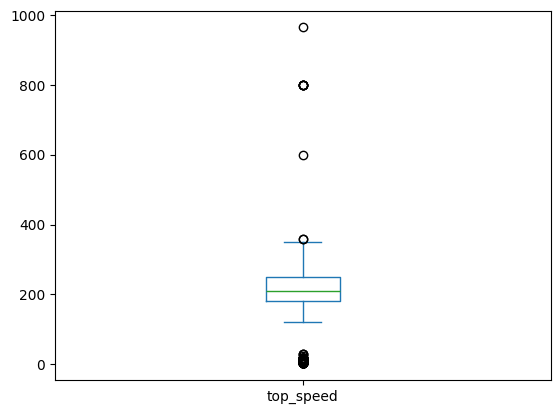

In [122]:
df['top_speed'].plot(kind='box')

<Axes: ylabel='Frequency'>

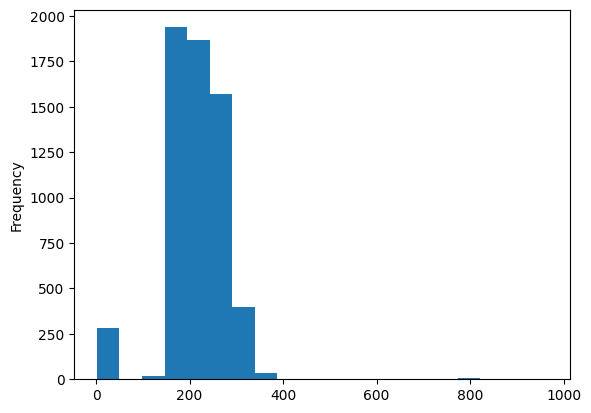

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6116 entries, 0 to 6124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6116 non-null   object 
 1   engine_capacity  6116 non-null   object 
 2   cylinder         5492 non-null   object 
 3   horse_power      6116 non-null   object 
 4   top_speed        6116 non-null   float64
 5   seats            6116 non-null   int64  
 6   brand            6116 non-null   object 
 7   country          6116 non-null   object 
 8   price            6116 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 477.8+ KB


In [85]:
df['cylinder'] = df['cylinder'].replace('N/A, Electric', 0)
df['cylinder'].value_counts()

cylinder
4     2798
6     1475
8      912
3      137
12     120
10      21
5       17
0       11
16       1
Name: count, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6116 entries, 0 to 6124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car name         6116 non-null   object 
 1   engine_capacity  6116 non-null   object 
 2   cylinder         5492 non-null   object 
 3   horse_power      6116 non-null   object 
 4   top_speed        6116 non-null   float64
 5   seats            6116 non-null   int64  
 6   brand            6116 non-null   object 
 7   country          6116 non-null   object 
 8   price            6116 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 477.8+ KB


In [ ]:
df['car name'].value_counts()

In [ ]:
df[df['car name'] == 'BMW 5 Series 2021 520i']

In [ ]:
df[df['car name'] == 'BMW 5 Series 2021 520i']

In [ ]:
df['price']

In [ ]:
df[df['car name'].duplicated()]

In [ ]:
df['country'].unique()

In [ ]:
df[df['car name'] == 'Aston Martin DBS Superleggera 2021 5.2T V12']

In [ ]:
df['car name'].nunique()

In [ ]:
df['country'].nunique()

In [ ]:
df.loc[indices]

In [ ]:
df[df['car name'] == 'Fiat 500e 2021 La Prima']

In [ ]:
df[df['car name'] == 'Peugeot Traveller 2021 L3 VIP']

In [ ]:
df['seats'].head()

In [ ]:
df['seats'] = df['seats'].apply(lambda x: re.findall(r'\d+', x)[0] if type(x) == str else x)

In [ ]:
df.info()


In [ ]:
df.head(5)

In [ ]:
# mask = df['top_speed'].str.contains('Seater', case=False)
# df.drop(df[mask].index, inplace=True)
# df.reset_index(drop=True, inplace=True)

In [ ]:
df['seats'] = df['seats'].apply(lambda x: x if 'seater' not in x.lower() else x[0])

In [ ]:
# Check if 'seats' column contains no numbers
mask = df['seats'].str.contains(r'^\D+$', regex=True)

mask.sum()
# df[mask==True]

In [ ]:
df['seats'].replace('N A', np.nan, inplace=True)

In [ ]:
df[mask]

In [ ]:
df.drop(df[mask==True].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df


In [ ]:
df['seats'].isna().sum()

In [ ]:
df.isna().sum()

In [ ]:
index = df['cylinder'].str.contains('Electric', case=False).index
df.loc[index, 'cylinder'] = 0

In [ ]:
df.head(5)

In [ ]:
df['cylinder'].value_counts()

In [ ]:
df['country'].value_counts()

In [ ]:
df['brand'].value_counts()

In [ ]:
# df['cylinder'] = df['cylinder'].replace('N/A, Electric', pd.NA)
# df.isna().sum()

In [ ]:
df.dropna(inplace=True)


In [ ]:
df['price'].value_counts()

In [ ]:
df['top_speed'].value_counts()
df['seats'].value_counts()

In [ ]:
 

df['seats'] = df['seats'].str.extract('(\d+)')

df['seats'].value_counts()